# Heart Disease Prediction – Exploratory Data Analysis

## Objective
To explore and understand the relationships between clinical features and the presence of heart disease.

## Research Questions
1. Which features are strongly associated with heart disease?
2. Is the dataset balanced?
3. Are there statistically significant differences between patients with and without heart disease?
4. Are scaling or transformations required?

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('../data/heart.csv')

# First look
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
df.head()

Shape of dataset: (918, 12)

First 5 rows:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Basic Information
print("Dataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
Exerci

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Zero Cholesterol count: 172
Zero RestingBP count: 1


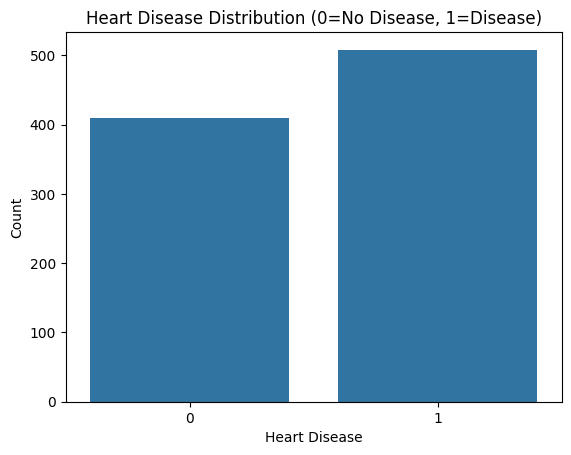

In [4]:
# Check impossible zero values
print("Zero Cholesterol count:", (df['Cholesterol'] == 0).sum())
print("Zero RestingBP count:", (df['RestingBP'] == 0).sum())

# Visualize target distribution
sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Distribution (0=No Disease, 1=Disease)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

In [5]:
target_counts = df['HeartDisease'].value_counts()
percentages = target_counts / len(df) * 100

print("Class Distribution:")
print(percentages)

Class Distribution:
HeartDisease
1    55.337691
0    44.662309
Name: count, dtype: float64


### Interpretation

The dataset contains approximately 55.33% patients with heart disease and 44.66% without.

The dataset appears (balanced / slightly imbalanced).  
Therefore, evaluation metrics such as Recall and ROC-AUC will be more appropriate than relying solely on accuracy.

In [6]:
# Replace 0 cholesterol with median (median is better than mean for skewed data)
cholesterol_median = df[df['Cholesterol'] != 0]['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].replace(0, cholesterol_median)

# Replace 0 RestingBP with median
bp_median = df[df['RestingBP'] != 0]['RestingBP'].median()
df['RestingBP'] = df['RestingBP'].replace(0, bp_median)

# Confirm zeros are gone
print("Zero Cholesterol remaining:", (df['Cholesterol'] == 0).sum())
print("Zero RestingBP remaining:", (df['RestingBP'] == 0).sum())
print("\n✅ Data cleaned successfully!")

Zero Cholesterol remaining: 0
Zero RestingBP remaining: 0

✅ Data cleaned successfully!


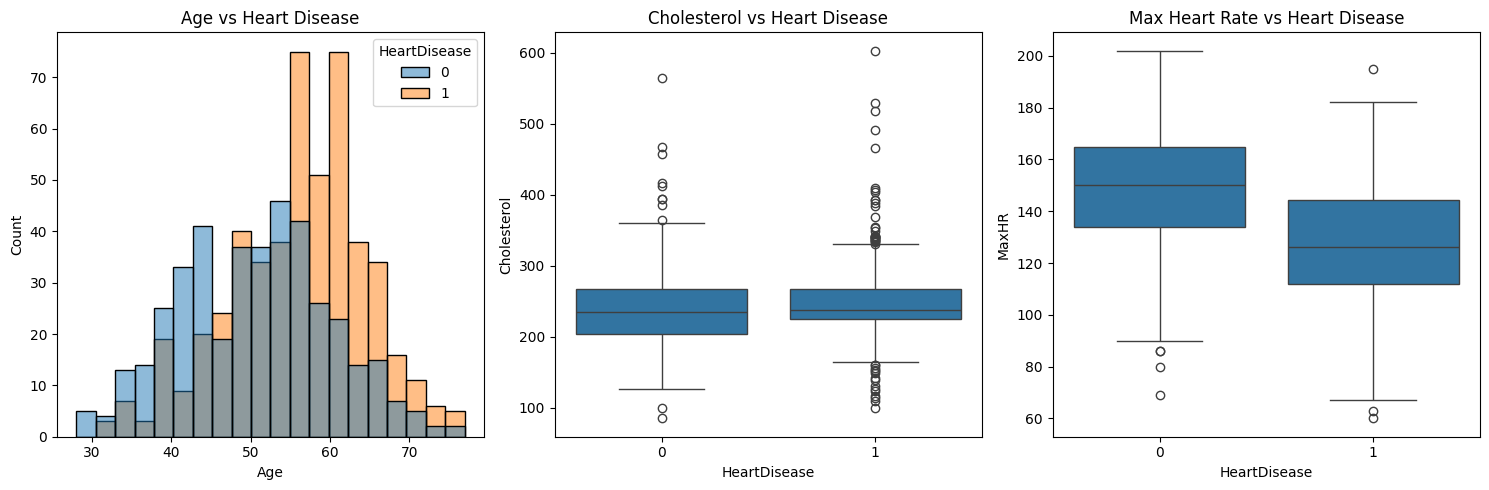

In [7]:
# Age distribution by Heart Disease
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(data=df, x='Age', hue='HeartDisease', bins=20)
plt.title('Age vs Heart Disease')

plt.subplot(1,3,2)
sns.boxplot(data=df, x='HeartDisease', y='Cholesterol')
plt.title('Cholesterol vs Heart Disease')

plt.subplot(1,3,3)
sns.boxplot(data=df, x='HeartDisease', y='MaxHR')
plt.title('Max Heart Rate vs Heart Disease')

plt.tight_layout()
plt.show()

### Outlier Analysis

Outliers observed in features like Cholesterol and Oldpeak appear clinically plausible.
Removing them could eliminate meaningful medical patterns, so they are retained.

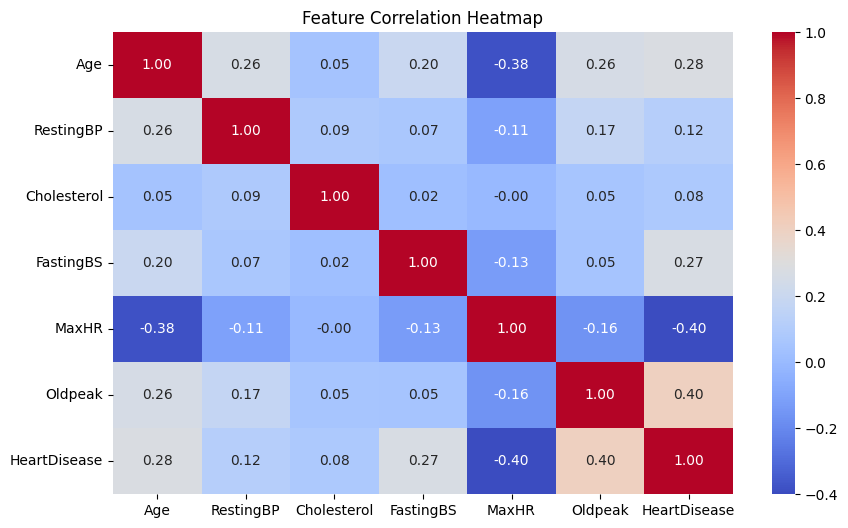

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Correlation Insights

- Oldpeak shows positive correlation with heart disease.
- MaxHR shows negative correlation.
- No extremely high multicollinearity observed.
- Moderate relationships suggest tree-based models may capture nonlinear patterns better.

In [19]:
from scipy.stats import ttest_ind

numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for feature in numerical_features:
    disease = df[df['HeartDisease'] == 1][feature]
    no_disease = df[df['HeartDisease'] == 0][feature]
    
    stat, p = ttest_ind(disease, no_disease)
    
    print(f"{feature} → p-value: {p}")

Age → p-value: 3.0079532400497116e-18
RestingBP → p-value: 0.0003479374969087406
Cholesterol → p-value: 0.0210919067906572
MaxHR → p-value: 1.1377859840278043e-36
Oldpeak → p-value: 2.390772424058943e-37


### Statistical Interpretation

Using independent t-tests, we examined whether the mean values of numerical features differ between patients with and without heart disease.

All tested features show p-values significantly less than 0.05:

- Age (p ≈ 3.00e-18)
- RestingBP (p ≈ 0.00035)
- Cholesterol (p ≈ 0.021)
- MaxHR (p ≈ 1.13e-36)
- Oldpeak (p ≈ 2.39e-37)

This indicates that there are statistically significant differences in these features between the two groups.

In particular, MaxHR and Oldpeak show extremely small p-values, suggesting strong discriminatory power.

Therefore, these variables are likely to contribute meaningfully to the predictive models.

In [21]:
df.groupby('HeartDisease')[numerical_features].mean()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
HeartDisease,,,,,
0,50.551220,130.180488,238.682927,148.151220,0.408049
1,55.899606,134.440945,246.854331,127.655512,1.274213


### Direction of Differences Between Groups

From the group-wise mean comparison:

- **Age**: Patients with heart disease (mean ≈ 55.9) are older on average than those without (mean ≈ 50.6).
- **RestingBP**: Slightly higher in heart disease patients (≈ 134.4 vs 130.2).
- **Cholesterol**: Higher in patients with heart disease (≈ 246.9 vs 238.7).
- **MaxHR**: Significantly lower in heart disease patients (≈ 127.7 vs 148.2).
- **Oldpeak**: Substantially higher in heart disease patients (≈ 1.27 vs 0.41).

These findings align with clinical expectations:

- Increased age and higher ST depression (Oldpeak) are associated with cardiovascular risk.
- Lower maximum heart rate (MaxHR) may indicate reduced cardiac efficiency.
- Elevated cholesterol and blood pressure are known risk factors.

This strengthens the validity of the dataset and supports the use of these variables in predictive modeling.

In [22]:
from scipy.stats import chi2_contingency

categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 
                        'RestingECG', 'ExerciseAngina', 'ST_Slope']

for feature in categorical_features:
    contingency = pd.crosstab(df[feature], df['HeartDisease'])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{feature} → p-value: {p}")

Sex → p-value: 4.597617450809164e-20
ChestPainType → p-value: 8.08372842808765e-58
FastingBS → p-value: 1.0573018731809955e-15
RestingECG → p-value: 0.0042292328167544925
ExerciseAngina → p-value: 2.907808387659878e-50
ST_Slope → p-value: 5.167637689470128e-78


### Chi-Square Test for Categorical Variables

Chi-square tests were conducted to examine the association between categorical features and heart disease.

All categorical variables show statistically significant association with the target variable (p < 0.05):

- Sex (p ≈ 4.60e-20)
- ChestPainType (p ≈ 8.08e-58)
- FastingBS (p ≈ 1.06e-15)
- RestingECG (p ≈ 0.0042)
- ExerciseAngina (p ≈ 2.91e-50)
- ST_Slope (p ≈ 5.17e-78)

Notably, ST_Slope, ChestPainType, and ExerciseAngina show extremely small p-values, indicating a very strong association with heart disease.

This suggests that categorical clinical indicators play a crucial role in prediction and should be carefully modeled.

In [9]:
# Check categorical columns
print("Categorical columns:")
print(df.select_dtypes(include='object').columns.tolist())

print("\nUnique values in each categorical column:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

Categorical columns:
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Unique values in each categorical column:
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


In [10]:
import subprocess
subprocess.run(['pip', 'install', 'scikit-learn'])

CompletedProcess(args=['pip', 'install', 'scikit-learn'], returncode=0)

In [11]:
# Encode categorical columns
import sklearn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("After encoding:")
df.head()

After encoding:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("\nData is ready for modeling!")

Training set size: (734, 11)
Testing set size: (184, 11)

Data is ready for modeling!


In [13]:
# Save cleaned dataset
df.to_csv('../data/heart_cleaned.csv', index=False)
print("Cleaned dataset saved!")

Cleaned dataset saved!


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, '../models/scaler.pkl')
print("Scaler saved!")

Scaler saved!


## Principal Component Analysis (PCA)

PCA is applied to explore whether dimensionality reduction can simplify the dataset 
while retaining most of the variance.

Although the dataset contains only 11 features, PCA helps:
- Examine latent feature structure
- Identify redundancy
- Evaluate dimensionality reduction feasibility

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Separate features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Scale data (VERY IMPORTANT for PCA)
scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X)

# Fit PCA on full data
pca_full = PCA()
pca_full.fit(X_scaled_all)

# Compute cumulative explained variance (0–1 scale)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

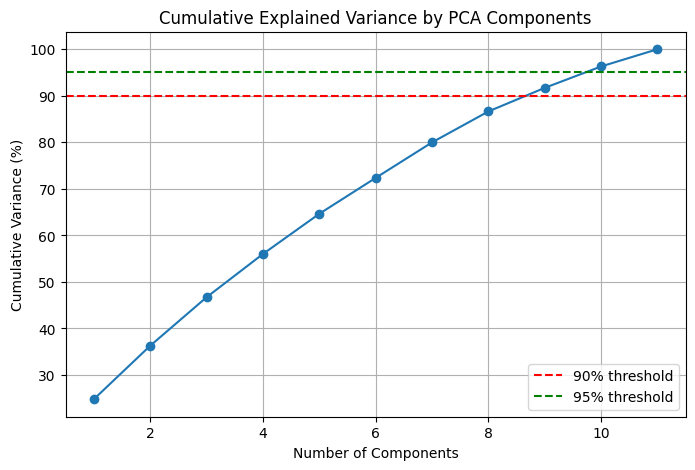

PC11: 3.65% | Cumulative: 1.0%


In [28]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1),
         cumulative_variance * 100,
         marker='o')

plt.axhline(y=90, color='r', linestyle='--', label='90% threshold')
plt.axhline(y=95, color='g', linestyle='--', label='95% threshold')

plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.legend()
plt.grid(True)
plt.show()
print(f"PC{i+1}: {round(var*100, 2)}% | Cumulative: {round(cumulative_variance[i], 2)}%")

### PCA Variance Analysis

The cumulative explained variance curve shows that:

- 9 components retain approximately 91.78% variance.
- 10 components retain approximately 96.35% variance.

Using a 95% variance retention threshold, 10 principal components are required.

This reduces dimensionality from 11 to 10 features, indicating limited reduction benefit.

In [29]:
for i, var in enumerate(pca_full.explained_variance_ratio_):
    print(f"PC{i+1}: {round(var*100, 2)}% | Cumulative: {round(cumulative_variance[i]*100, 2)}%")

PC1: 24.81% | Cumulative: 24.81%
PC2: 11.49% | Cumulative: 36.29%
PC3: 10.42% | Cumulative: 46.71%
PC4: 9.29% | Cumulative: 56.0%
PC5: 8.64% | Cumulative: 64.64%
PC6: 7.71% | Cumulative: 72.35%
PC7: 7.63% | Cumulative: 79.98%
PC8: 6.65% | Cumulative: 86.63%
PC9: 5.07% | Cumulative: 91.7%
PC10: 4.6% | Cumulative: 96.3%
PC11: 3.7% | Cumulative: 100.0%


In [30]:
# Determine components needed for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print("Components needed for 95% variance:", n_components_95)

# Apply optimal PCA
pca_optimal = PCA(n_components=n_components_95)
X_pca_optimal = pca_optimal.fit_transform(X_scaled_all)

print(f"Original features: {X_scaled_all.shape[1]}")
print(f"After PCA components: {X_pca_optimal.shape[1]}")
print(f"Variance retained: {round(sum(pca_optimal.explained_variance_ratio_)*100, 2)}%")

# Save PCA model
joblib.dump(pca_optimal, '../models/pca.pkl')

Components needed for 95% variance: 10
Original features: 11
After PCA components: 10
Variance retained: 96.3%


['../models/pca.pkl']

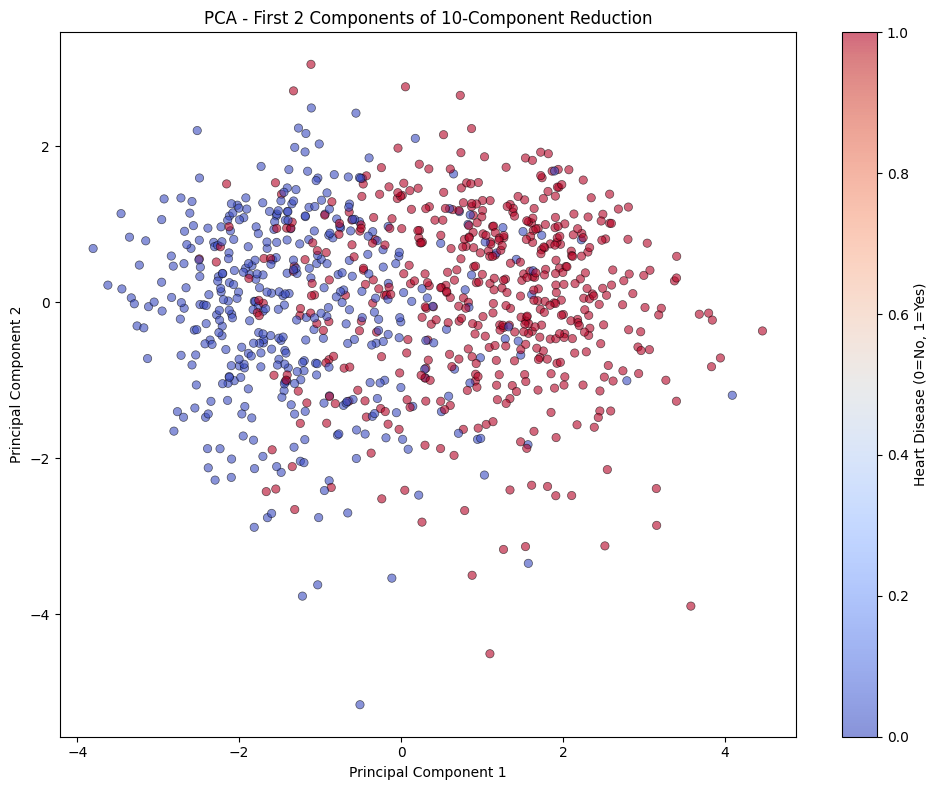

In [32]:
plt.figure(figsize=(10,8), dpi=100)

scatter = plt.scatter(
    X_pca_optimal[:, 0],
    X_pca_optimal[:, 1],
    c=y,
    cmap='coolwarm',
    alpha=0.6,
    edgecolors='k',
    linewidths=0.5
)

plt.colorbar(scatter, label='Heart Disease (0=No, 1=Yes)')
plt.title(f'PCA - First 2 Components of {n_components_95}-Component Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### PCA Visualization Interpretation

The first two principal components explain approximately 36% of the total variance.

Some separation between classes is visible in the 2D projection, 
but significant overlap remains.

This suggests that the dataset is not strongly linearly separable 
in low-dimensional space.

### Final Decision on PCA Usage

Although PCA was explored, the dataset contains only 11 features 
and interpretability is important in medical prediction tasks.

Since dimensionality reduction is minimal (11 → 10 features), 
the original feature space will be retained for final modeling.

PCA analysis is used here for exploratory understanding rather than primary prediction.

# Final Exploratory Data Analysis (EDA) Summary

The exploratory analysis of the heart disease dataset revealed several important insights:

## 1. Class Distribution
The dataset is slightly imbalanced, though not severely skewed. 
This suggests that evaluation metrics beyond accuracy (e.g., Recall, ROC-AUC) will be important during modeling.

## 2. Numerical Features
Independent t-tests indicate that all major numerical variables 
(Age, RestingBP, Cholesterol, MaxHR, Oldpeak) show statistically significant differences 
between patients with and without heart disease (p < 0.05).

In particular:
- Oldpeak and MaxHR demonstrate strong discriminatory power.
- Patients with heart disease tend to be older, have higher Oldpeak, 
  slightly higher cholesterol and resting blood pressure, 
  and lower maximum heart rate.

These findings align with known cardiovascular risk factors.

## 3. Categorical Features
Chi-square tests confirm that all categorical variables 
(Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope) 
are significantly associated with heart disease.

Notably, ST_Slope, ChestPainType, and ExerciseAngina 
show extremely strong statistical associations.

## 4. Correlation & Multicollinearity
Correlation analysis did not reveal severe multicollinearity. 
Feature relationships appear moderate, suggesting that both linear and tree-based models may perform effectively.

## 5. PCA Insights
PCA analysis showed that 10 components are required to retain 95% of variance, 
reducing dimensionality from 11 to 10 features.

Given the limited reduction benefit and the importance of interpretability 
in medical prediction tasks, the original feature space will be retained for modeling.

---

### Overall Conclusion

Both numerical and categorical predictors demonstrate strong statistical relationships 
with heart disease, indicating that the dataset contains meaningful predictive signal.

The EDA findings provide a strong foundation for the modeling phase, 
where multiple classification algorithms will be evaluated using appropriate performance metrics.